In [13]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
DATA_PATH = "../data/recola_all_participants_clean_preprocessed.csv"

In [31]:
processed_recola_df = pd.read_csv(DATA_PATH)

# audio and visual modalities
AUDIO_COLS = [col for col in processed_recola_df.columns if col.startswith("ComParE")]
VISUAL_COLS = [col for col in processed_recola_df.columns if col.startswith("VIDEO")]

# physiological activity
EDA_COLS = [col for col in processed_recola_df.columns if col.startswith("EDA")]
ECG_COLS = [col for col in processed_recola_df.columns if col.startswith("ECG")]

# emotional state indicators
TARGET_COLS = ["median_arousal", "median_valence"]


print("Number of participants:", len(processed_recola_df["Participant"].unique()))
print("\nData overview:")
display(processed_recola_df.describe().T)

display(pd.DataFrame(processed_recola_df["Participant"].value_counts().sort_index()).T)

Number of participants: 18

Data overview:


,count,mean,std,min,25%,50%,75%,max
Participant,13066.0,3.650643e+01,14.314113,16.000000,25.000000,37.000000,45.000000,65.000000
ComParE13_LLD_25Hz_F0final_sma_amean,13066.0,1.196383e-16,1.000038,-4.511748,-0.662860,-0.016521,0.671209,4.764065
ComParE13_LLD_25Hz_voicingFinalUnclipped_sma_amean,13066.0,1.870708e-16,1.000038,-5.509871,-0.593116,0.131843,0.772767,2.349541
ComParE13_LLD_25Hz_jitterLocal_sma_amean,13066.0,5.546867e-17,1.000038,-2.691226,-0.724874,-0.132278,0.599420,5.772033
ComParE13_LLD_25Hz_jitterDDP_sma_amean,13066.0,4.350484e-18,1.000038,-2.351321,-0.738623,-0.125142,0.613312,5.832032
...,...,...,...,...,...,...,...,...
EDA_62_LLD_SCR_skewness_delta,13066.0,-1.359526e-18,1.000038,-10.329649,-0.505911,0.009371,0.499570,10.110243
EDA_62_LLD_SCR_NSImn_delta,13066.0,-2.719052e-18,1.000038,-20.592856,-0.534006,0.006631,0.546138,16.774698
EDA_62_LLD_SCR_NLDmn_delta,13066.0,-1.631431e-18,1.000038,-16.996975,-0.600870,-0.001260,0.617770,12.005575
median_arousal,13066.0,2.394888e-02,0.189994,-0.644200,-0.103450,0.061000,0.165767,0.487000


Participant,16,19,21,23,25,26,28,30,34,37,39,41,42,45,46,56,64,65
count,729,715,734,728,725,728,729,738,693,731,726,733,737,718,715,731,725,731


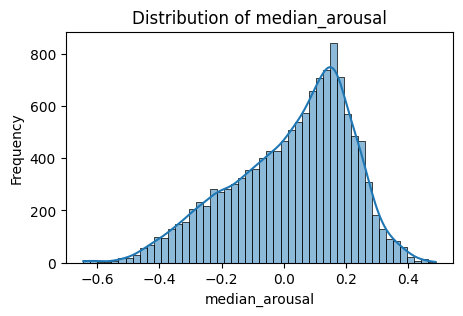

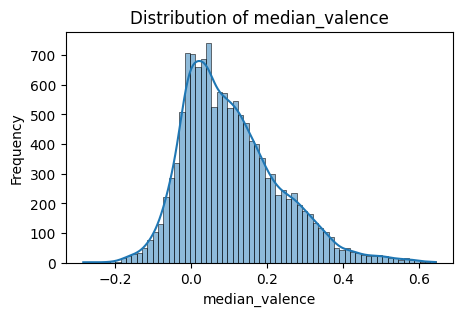

In [19]:
# distribution for the target variables; arousal and valence
for column in TARGET_COLS:
    plt.figure(figsize=(5, 3))
    sns.histplot(processed_recola_df[column], kde=True)
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()

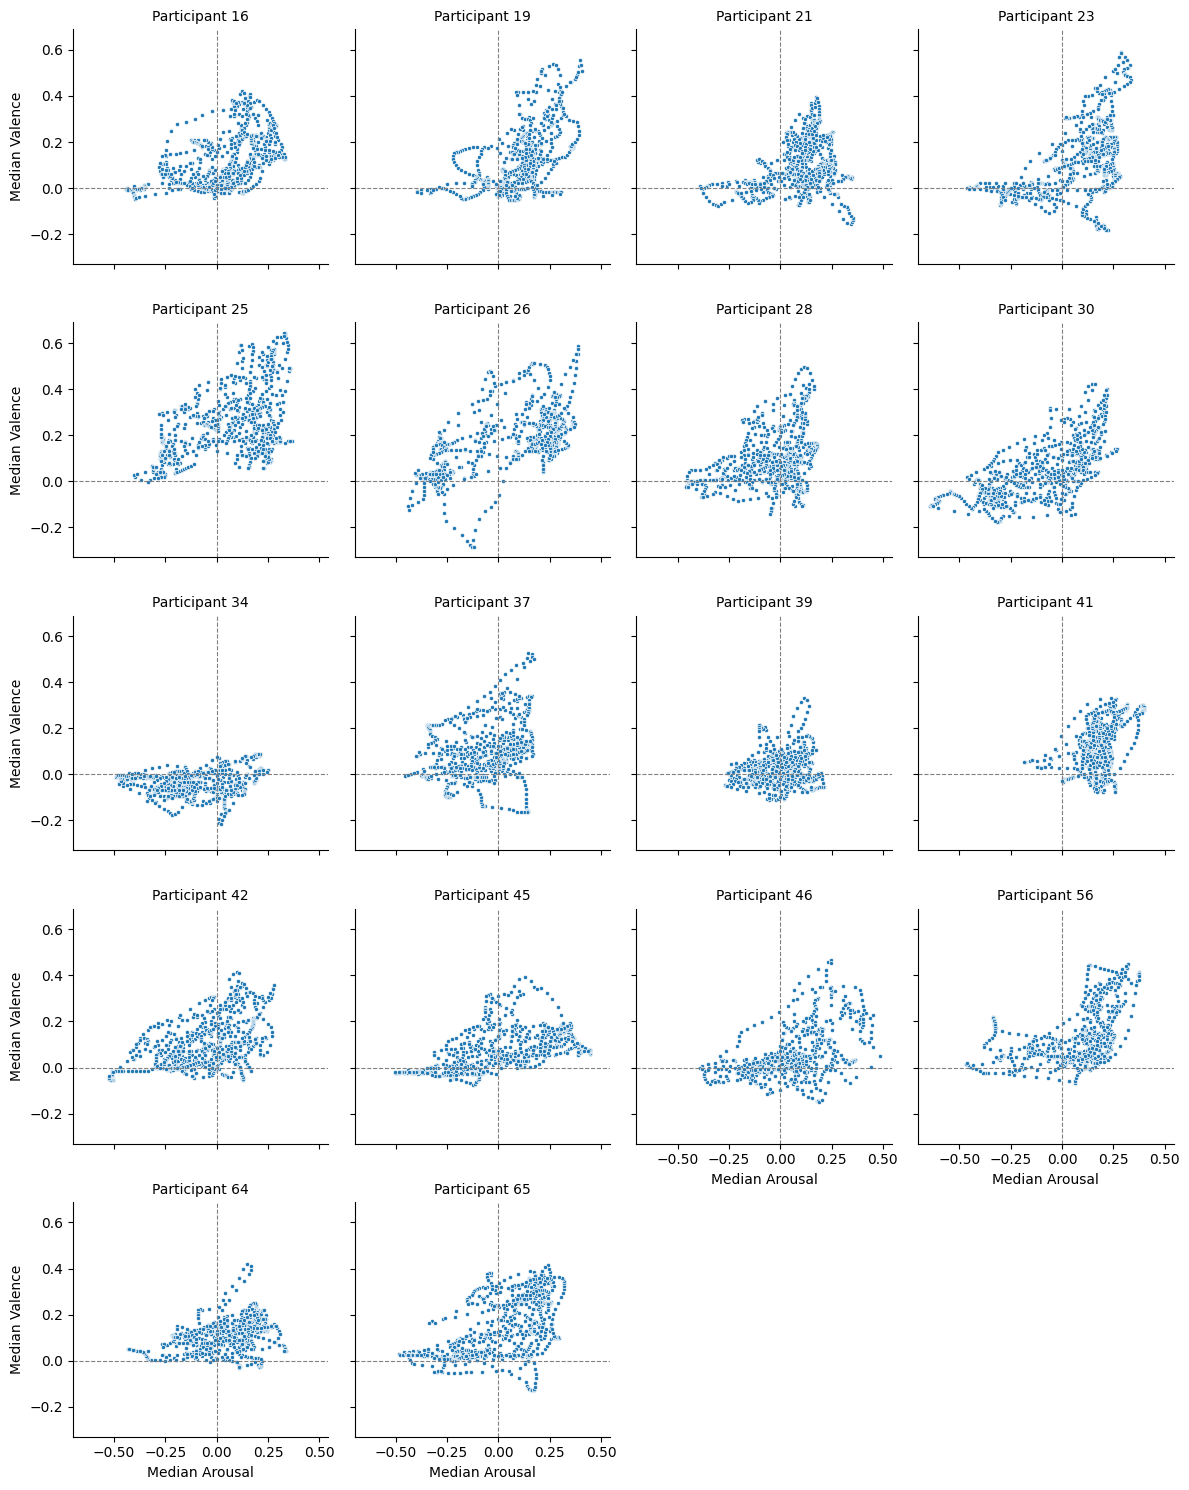

In [ ]:
# scatter plot per participat, arousal vs valence
g = sns.FacetGrid(processed_recola_df, col="Participant", col_wrap=4, height=3)
g.map(sns.scatterplot, "median_arousal", "median_valence", marker=".")

# Add gray lines at x=0 and y=0 for each subplot
for ax in g.axes.flat:
    ax.axhline(0, color="gray", linestyle="--", linewidth=0.8)  # Horizontal line at y=0
    ax.axvline(0, color="gray", linestyle="--", linewidth=0.8)  # Vertical line at x=0

# Set axis labels and titles
g.set_axis_labels("Median Arousal", "Median Valence")
g.set_titles("Participant {col_name}")
g.tight_layout()

plt.show()